In [2]:
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold,datasets
from sklearn.decomposition import PCA

In [4]:
n_points=1000
X,color=datasets.make_swiss_roll(n_points,random_state=0)

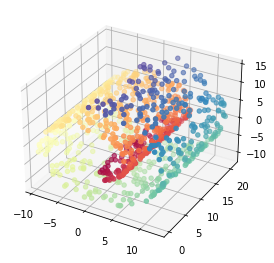

In [8]:
#Plot 3d scatterplot
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(231,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=color,cmap=plt.cm.Spectral)

In [12]:
import plotly.express as px
import pandas as pd

In [19]:
df=pd.DataFrame(X)
df.head()

,0,1,2
0,-8.857083,12.450486,-4.388853
1,5.056923,0.211338,-10.276002
2,-5.887992,9.992350,-8.564592
3,-8.979766,14.884178,-4.042624
4,-6.547310,0.923484,5.737069


In [24]:
df["color"]=color

In [25]:
px.scatter_3d(df,x=0,y=1,z=2,color="color")

In [26]:
n_neighbors=10
n_components=2

In [27]:
#LLE
LLE=partial(manifold.LocallyLinearEmbedding,n_neighbors=n_neighbors,n_components=n_components,eigen_solver='auto')
lle=LLE(method='standard')
lle_data=lle.fit_transform(X)

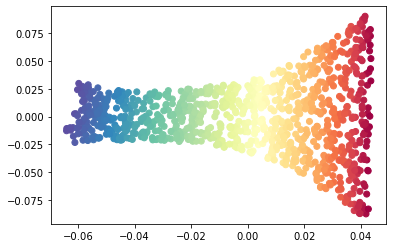

In [29]:
plt.scatter(lle_data[:,0],lle_data[:,1],c=color,cmap=plt.cm.Spectral)

In [31]:
TSNE=manifold.TSNE(n_components=n_components,init='pca',random_state=0)

In [32]:
tsne_data=TSNE.fit_transform(X)

In [33]:
tsne_data

array([[-34.963512 ,   9.765696 ],
       [-19.594511 , -13.297202 ],
       [-27.793148 ,  -1.3894756],
       ...,
       [ 27.543167 , -32.895798 ],
       [ 10.234345 ,  17.007597 ],
       [-24.92651  , -20.836178 ]], dtype=float32)

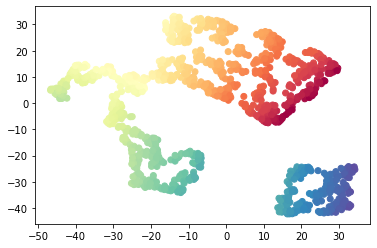

In [34]:
plt.scatter(tsne_data[:,0],tsne_data[:,1],c=color,cmap=plt.cm.Spectral)

In [35]:
pca=PCA(n_components=n_components)

In [36]:
pca.fit(X)

PCA(n_components=2)

In [37]:
pca_data=pca.fit_transform(X)
pca_data

array([[ -9.02517248,   4.12747373],
       [ -9.22985586,   1.13771336],
       [-11.69493205,   2.34887864],
       ...,
       [ 11.93937133,   0.66624081],
       [  4.62299944,  -3.20407066],
       [-10.92914073,  -3.45344393]])

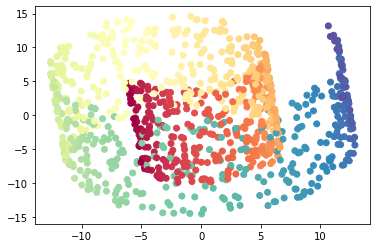

In [38]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=color,cmap=plt.cm.Spectral)